LEVEL **1**

Task: Top Cuisines

Determine the top three most
common cuisines in the dataset.

In [2]:
from collections import Counter
import pandas as pd

# Assuming 'dataset' is a list containing cuisine data
Dataset =pd.read_csv('/content/dataset.csv.csv')
x=Dataset['Cuisines']

# Count the occurrences of each cuisine
cuisine_counter = Counter(x)

# Get the top three most common cuisines
top_three_cuisines = cuisine_counter.most_common(3)

print("Top three most common cuisines:")
for cuisine, count in top_three_cuisines:
    print(f"{cuisine}: {count} occurrences")


Top three most common cuisines:
North Indian: 936 occurrences
North Indian, Chinese: 511 occurrences
Chinese: 354 occurrences


In [3]:
Dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Calculate the percentage of
restaurants that serve each of the top
cuisines.

In [ ]:
from collections import Counter



# Count the occurrences of each cuisine
cuisine_counter = Counter(x)

# Get the top three most common cuisines
top_three_cuisines = cuisine_counter.most_common(3)

# Total number of restaurants
total_restaurants = len(x)

print("Percentage of restaurants serving each of the top cuisines:")
for cuisine, count in top_three_cuisines:
    percentage = (count / total_restaurants) * 100
    print(f"{cuisine}: {percentage:.2f}%")


Percentage of restaurants serving each of the top cuisines:
North Indian: 9.80%
North Indian, Chinese: 5.35%
Chinese: 3.71%


task 2 city analysis

Identify the city with the highest number
of restaurants in the dataset.

In [11]:
import pandas as pd

# Assuming you have a DataFrame named 'restaurants_df' with columns 'City' and 'Number of Restaurants'
# Replace 'restaurants_df' with the actual DataFrame containing your data



cntry_dist = Dataset.groupby(['Country Code','City']).agg( Count = ('Restaurant ID','count'))
cntry_dist.sort_values(by='Count',ascending=False)








Count
Country Code City                   
1            New Delhi          5473
             Gurgaon            1118
             Noida              1080
             Faridabad           251
             Ghaziabad            25
...                              ...
37           Vineland Station      1
             Yorkton               1
94           Bandung               1
162          Quezon City           1
216          Winchester Bay        1

[141 rows x 1 columns]

In [13]:
city_dist = Dataset.groupby('City').agg(Count = ('Restaurant ID','count'))
city_dist.describe()

,Count
count,141.000000
mean,67.737589
std,476.723245
min,1.000000
25%,1.000000
50%,20.000000
75%,20.000000
max,5473.000000


In [14]:
city_dist.sort_values(by='Count',ascending=False)

,Count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
...,...
Dicky Beach,1
Lorn,1
Quezon City,1


Calculate the average rating for
restaurants in each city.

In [16]:
max_rate = Dataset.sort_values(by='Aggregate rating',ascending=False).groupby(['Country Code','City'],as_index=False).first()
#highest rating restaurants

min_rate = Dataset.sort_values(by='Aggregate rating',ascending=False).groupby(['Country Code','City'],as_index=False).last()
#lowest rating restaurants

df_max=max_rate[['Country Code','City','Restaurant Name','Aggregate rating']] #new dataframe created for high rated restaurants

df_min=min_rate[['Country Code','City','Restaurant Name','Aggregate rating']] #new dataframe created for low rated restaurants

rating_rest=df_max.merge(df_min,left_on='City',right_on='City',how='inner') #merge into single dataframe
rating_rest


,Country Code_x,City,Restaurant Name_x,Aggregate rating_x,Country Code_y,Restaurant Name_y,Aggregate rating_y
0,1,Agra,Sheroes Hangout,4.9,1,The Charcoal Chimney,3.4
1,1,Ahmedabad,Cryo Lab,4.6,1,MoMo Caf�� - Courtyard By Marriott,3.6
2,1,Allahabad,Eat On,3.7,1,Bikanerwala,3.2
3,1,Amritsar,Gurdas Ram Jalebi Wala,4.1,1,Crystal Restaurant,3.4
4,1,Aurangabad,Bhoj Restaurant,3.7,1,Domino's Pizza,3.1
...,...,...,...,...,...,...,...
136,216,Valdosta,Smok'n Pig B-B-Q,4.1,216,El Toreo Mexican Restaurant,3.1
137,216,Vernonia,Blue House Cafe,4.3,216,Blue House Cafe,4.3
138,216,Waterloo,Tokyo Japanese Steak House,3.9,216,Masala Grill & Coffee House,3.2
139,216,Weirton,Theo Yianni's Authentic Greek Restaurant,3.9,216,Theo Yianni's Authentic Greek Restaurant,3.9


In [17]:
rating_rest.drop(columns='Country Code_y',axis=1,inplace=True)
rating_rest.columns = ['Country','City','Highest Rated Restaurant','Rating Max','Lowest Rated Restaurant','Rating Min']
rating_rest

,Country,City,Highest Rated Restaurant,Rating Max,Lowest Rated Restaurant,Rating Min
0,1,Agra,Sheroes Hangout,4.9,The Charcoal Chimney,3.4
1,1,Ahmedabad,Cryo Lab,4.6,MoMo Caf�� - Courtyard By Marriott,3.6
2,1,Allahabad,Eat On,3.7,Bikanerwala,3.2
3,1,Amritsar,Gurdas Ram Jalebi Wala,4.1,Crystal Restaurant,3.4
4,1,Aurangabad,Bhoj Restaurant,3.7,Domino's Pizza,3.1
...,...,...,...,...,...,...
136,216,Valdosta,Smok'n Pig B-B-Q,4.1,El Toreo Mexican Restaurant,3.1
137,216,Vernonia,Blue House Cafe,4.3,Blue House Cafe,4.3
138,216,Waterloo,Tokyo Japanese Steak House,3.9,Masala Grill & Coffee House,3.2
139,216,Weirton,Theo Yianni's Authentic Greek Restaurant,3.9,Theo Yianni's Authentic Greek Restaurant,3.9


Determine the city with the highest
average rating.

In [18]:
import pandas as pd

# Assuming you have a DataFrame named 'restaurants_df' with columns 'City' and 'Rating'
# Replace 'restaurants_df' with the actual DataFrame containing your data



# Group by city and calculate the average rating
city_avg_rating = Dataset.groupby('City')['Aggregate rating'].mean()

# Find the city with the highest average rating
city_with_highest_avg_rating = city_avg_rating.idxmax()
highest_avg_rating = city_avg_rating.max()

print("City with the highest average rating:", city_with_highest_avg_rating)
print("Highest average rating:", highest_avg_rating)



City with the highest average rating: Inner City
Highest average rating: 4.9


Task: Price Range Distribution

Create a histogram or bar chart to
visualize the distribution of price ranges
among the restaurants.

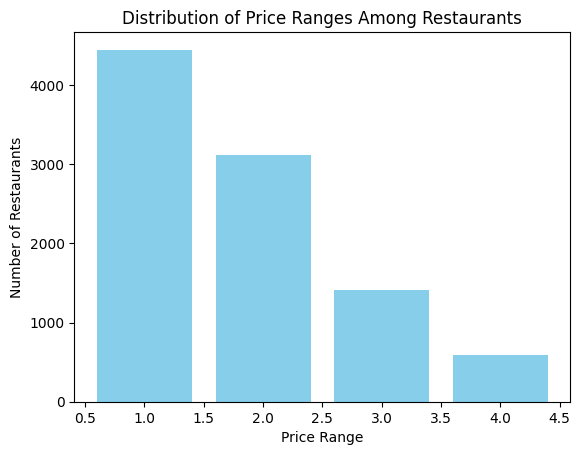

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'restaurants_df' with a column 'Price Range'
# Replace 'restaurants_df' with the actual DataFrame containing your data



# Count the occurrences of each price range
price_range_counts = Dataset['Price range'].value_counts()

# Plotting a bar chart
plt.bar(price_range_counts.index, price_range_counts.values, color='skyblue')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()




Calculate the percentage of restaurants
in each price range category.

In [20]:
import pandas as pd

# Assuming you have a DataFrame named 'restaurants_df' with a column 'Price Range'
# Replace 'restaurants_df' with the actual DataFrame containing your data



# Count the occurrences of each price range
price_range_counts = Dataset['Price range'].value_counts()

# Calculate the total number of restaurants
total_restaurants = len(Dataset)

# Calculate the percentage of restaurants in each price range category
price_range_percentages = (price_range_counts / total_restaurants) * 100

print("Percentage of restaurants in each price range category:")
print(price_range_percentages)


Percentage of restaurants in each price range category:
Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


Task: Online Delivery

Determine the percentage of restaurants
that offer online delivery.

In [27]:


# Assuming you have a DataFrame named 'restaurants_df' with a column 'Online Delivery'
# Replace 'restaurants_df' with the actual DataFrame containing your data




# Count the occurrences of restaurants offering online delivery
online_delivery_counts = Dataset['Has Online delivery'].value_counts()

# Calculate the total number of restaurants
total_restaurants = len(Dataset)

# Calculate the percentage of restaurants offering online delivery
percentage_online_delivery = (online_delivery_counts / total_restaurants) * 100

print("Percentage of restaurants that offer online delivery:", percentage_online_delivery)


Percentage of restaurants that offer online delivery: Has Online delivery
No     74.337766
Yes    25.662234
Name: count, dtype: float64


Compare the average ratings of restaurants
with and without online delivery

In [26]:


# Assuming you have a DataFrame named 'restaurants_df' with columns 'Rating' and 'Online Delivery'
# Replace 'restaurants_df' with the actual DataFrame containing your data



# Calculate the average rating for restaurants with online delivery
avg_rating_with_delivery = Dataset[Dataset['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()

# Calculate the average rating for restaurants without online delivery
avg_rating_without_delivery = Dataset[Dataset['Has Online delivery'] == 'No']['Aggregate rating'].mean()

print("Average rating for restaurants with online delivery:", avg_rating_with_delivery)
print("Average rating for restaurants without online delivery:", avg_rating_without_delivery)


Average rating for restaurants with online delivery: 3.2488372093023257
Average rating for restaurants without online delivery: 2.465295774647887


LEVEL **3**

Task3: Restaurant Reviews

Analyze the text reviews to identify the most
common positive and negative keywords.

In [36]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Sample positive and negative reviews
reviews = Dataset['Rating text']



# Tokenize the reviews and convert to lowercase
words = [word.lower() for review in reviews for word in word_tokenize(review)]


# Remove stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]


# Count the frequency of words
positive_word_freq = Counter(words)


# Print the most common positive and negative keywords
print("Most common  keywords:")
print(positive_word_freq.most_common(5))




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most common  keywords:
[('average', 3737), ('good', 3179), ('rated', 2148), ('excellent', 301), ('poor', 186)]


Calculate the average length of reviews and
explore if there is a relationship between
review length and rating.

In [39]:
import pandas as pd

# Assuming you have a DataFrame named 'reviews_df' with columns 'Review' and 'Rating'
# Replace 'reviews_df' with the actual DataFrame containing your data



# Calculate the length of each review
Dataset['Review Length'] = Dataset['Rating text'].apply(len)

# Calculate the average length of reviews
average_review_length = Dataset['Review Length'].mean()

print("Average length of reviews:", average_review_length)

# Explore the relationship between review length and rating
rating_vs_length = Dataset.groupby('Rating text')['Review Length'].mean()

print("\nRelationship between review  and rating:")
print(rating_vs_length)


Average length of reviews: 7.020730813527379

Relationship between review  and rating:
Rating text
Average      7.0
Excellent    9.0
Good         4.0
Not rated    9.0
Poor         4.0
Very Good    9.0
Name: Review Length, dtype: float64


**Task2: Votes Analysis**


Identify the restaurants with the highest and
lowest number of votes.

In [41]:


# Assuming you have a DataFrame named 'restaurants_df' with columns 'Restaurant' and 'Votes'
# Replace 'restaurants_df' with the actual DataFrame containing your data


# Find the restaurant with the highest number of votes
restaurant_highest_votes = Dataset.loc[Dataset['Votes'].idxmax()]

# Find the restaurant with the lowest number of votes
restaurant_lowest_votes = Dataset.loc[Dataset['Votes'].idxmin()]

print("Restaurant with the highest number of votes:")
print(restaurant_highest_votes)

print("\nRestaurant with the lowest number of votes:")
print(restaurant_lowest_votes)


Restaurant with the highest number of votes:
Restaurant ID                                                       51705
Restaurant Name                                                      Toit
Country Code                                                            1
City                                                            Bangalore
Address                 298, Namma Metro Pillar 62, 100 Feet Road, Ind...
Locality                                                      Indiranagar
Locality Verbose                                   Indiranagar, Bangalore
Longitude                                                       77.640709
Latitude                                                        12.979166
Cuisines                                         Italian, American, Pizza
Average Cost for two                                                 2000
Currency                                               Indian Rupees(Rs.)
Has Table booking                                                  

Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.

In [42]:
import pandas as pd

# Assuming you have a DataFrame named 'restaurants_df' with columns 'Votes' and 'Rating'
# Replace 'restaurants_df' with the actual DataFrame containing your data



# Calculate the Pearson correlation coefficient
correlation = Dataset['Votes'].corr(Dataset['Aggregate rating'])

print("Correlation between number of votes and rating:", correlation)


Correlation between number of votes and rating: 0.31369058419541157


**LEVEL3**

Task3: Price Range vs. Online Delivery and
Table Booking

Analyze if there is a relationship between the
price range and the availability of online
delivery and table booking.

In [44]:


# Assuming you have a DataFrame named 'restaurants_df' with columns 'Price Range', 'Online Delivery', and 'Table Booking'
# Replace 'restaurants_df' with the actual DataFrame containing your data


# Create a cross-tabulation table to analyze the relationship between price range and online delivery
online_delivery_cross_tab = pd.crosstab(Dataset['Price range'], Dataset['Has Online delivery'], margins=True)

# Create a cross-tabulation table to analyze the relationship between price range and table booking
table_booking_cross_tab = pd.crosstab(Dataset['Price range'], Dataset['Has Table booking'], margins=True)

print("Cross-tabulation table for price range and online delivery:")
print(online_delivery_cross_tab)

print("\nCross-tabulation table for price range and table booking:")
print(table_booking_cross_tab)


Cross-tabulation table for price range and online delivery:
Has Online delivery    No   Yes   All
Price range                          
1                    3743   701  4444
2                    1827  1286  3113
3                     997   411  1408
4                     533    53   586
All                  7100  2451  9551

Cross-tabulation table for price range and table booking:
Has Table booking    No   Yes   All
Price range                        
1                  4443     1  4444
2                  2874   239  3113
3                   764   644  1408
4                   312   274   586
All                8393  1158  9551


Determine if higher-priced restaurants are
more likely to offer these services.

In [45]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming you have a DataFrame named 'restaurants_df' with columns 'Price Range', 'Online Delivery', and 'Table Booking'
# Replace 'restaurants_df' with the actual DataFrame containing your data

# Create a contingency table for the chi-square test
contingency_table = pd.crosstab(Dataset['Price range'], [Dataset['Has Online delivery'], Dataset['Has Table booking']], margins=True)

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-square test statistic:", chi2)
print("p-value:", p)

# Check significance level
alpha = 0.05
if p < alpha:
    print("\nThere is a significant association between price range and the availability of online delivery and table booking.")
else:
    print("\nThere is no significant association between price range and the availability of online delivery and table booking.")


Chi-square test statistic: 3778.7126357124143
p-value: 0.0

There is a significant association between price range and the availability of online delivery and table booking.
